In [1]:
%matplotlib inline
import random
from images import *
from NumberClass import *
from math import *
from operator import itemgetter, attrgetter
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal

'\nfor t in range(21):\n    correct = 0\n    for i in range(5000):\n        numberValue = int(images.getLabels(i))\n        dotArray = []\n        if numberClass[numberValue].getStatus() == 0:\n            maxIndex = numberValue\n            numberClass[numberValue].changeStatus()\n        else:\n            for index in range (10):\n                dotArray.append(ma.dot(numberClass[index].getWeights(), numberClass[index].getFeature()))\n            maxIndex = dotArray.index(max(dotArray))\n    \n        if maxIndex != numberValue:\n            for row in range(28):\n                for column in range(28): \n                    numberClass[numberValue].updateWeightVector((float(5000)/(1000+2*t)),row,column)\n                    numberClass[maxIndex].updateWeightVector(-(float(5000)/(1000+2*t)),row,column)\n        else:\n            correct += 1\n    print correct\nx.append(0)\n'

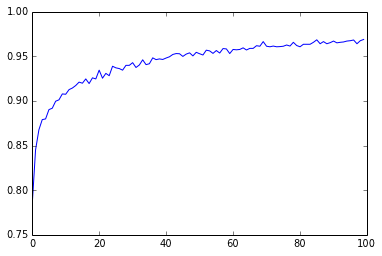

In [14]:
def alpha(i):
    return float(1000)/(1000+i)

images = imageArray('trainingimages','traininglabels')
numberClass = []
labelArray = []
x = []
y = []
maxIndex = 0

for i in range(10) :
    numberClass.append(NumberClass()) 
    labelArray.append(0)
    
'''Training'''
trainingAccuracies = []
numImages = 5000
epoch = 100
for t in range(epoch):
    currentAccuracy = 0
    for i in range(numImages):
        numberValue = int(images.getLabels(i))
        imageData = []
        imageData = images.getImage(i)
        featureVector = []
        for row in range(28):
            for column in range(28): 
                if imageData[row][column] == ' ':
                    featureVector.append(0)
                else:
                    featureVector.append(1)
        featureVector = np.array(featureVector, dtype = float)

        #apply one-vs-all method
        maxValue = -100 # practically -infinity
        estimateClass = 0 
        for index in range(10):
            realClass = -1 
            if index == numberValue:
                realClass = 1
            value = np.dot(featureVector, numberClass[index].weightVector)
            classification = 0
            if value < 0:
                classification = -1
            else:
                classification = 1
            numberClass[index].weightVector += alpha(t)*(realClass-classification)*featureVector
            
            if value > maxValue:
                maxValue = value
                estimateClass = index
        
        if estimateClass == numberValue:
            currentAccuracy += 1
    
    trainingAccuracies.append(float(currentAccuracy)/5000)
    
plt.plot(range(epoch), trainingAccuracies)

In [22]:
''' Testing '''
images = imageArray('testimages','testlabels')
numImages = 1000
accuracy = 0
confusionMatrix = [[0 for i in range(10)] for j in range(10)]
for i in range(numImages):
    numberValue = int(images.getLabels(i))
    imageData = []
    imageData = images.getImage(i)
    featureVector = []
    for row in range(28):
        for column in range(28): 
            if imageData[row][column] == ' ':
                featureVector.append(0)
            else:
                featureVector.append(1)
    featureVector = np.array(featureVector, dtype = float)

    #apply one-vs-all method
    maxValue = -100 # practically -infinity
    estimateClass = 0 
    for index in range(10):
        value = np.dot(featureVector, numberClass[index].weightVector)

        if value > maxValue:
            maxValue = value
            estimateClass = index

    if estimateClass == numberValue:
        accuracy += 1
        
    confusionMatrix[numberValue][estimateClass] += 1
        
accuracy = float(accuracy) / numImages 
print accuracy
print confusionMatrix

0.768
[[82, 0, 2, 1, 0, 2, 1, 0, 2, 0], [0, 105, 0, 0, 1, 0, 1, 0, 1, 0], [5, 1, 78, 5, 4, 0, 5, 0, 4, 1], [4, 0, 2, 78, 0, 11, 0, 3, 1, 1], [4, 1, 3, 0, 82, 0, 3, 2, 5, 7], [7, 0, 1, 4, 0, 70, 1, 2, 4, 3], [5, 1, 2, 0, 2, 2, 79, 0, 0, 0], [6, 3, 4, 2, 3, 0, 0, 66, 4, 18], [23, 2, 7, 4, 4, 6, 1, 1, 49, 6], [4, 0, 1, 3, 7, 0, 0, 3, 3, 79]]


In [20]:
a = [[1,2,3], [4,5,6], [7,8,9]]
print a
print a[2][1]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
8
